# LAB 6 MOS:  Algoritmos Genéticos para Resolución de Problemas Complejos

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Problema 1: Corridor Crawler (Laberinto Determinístico)

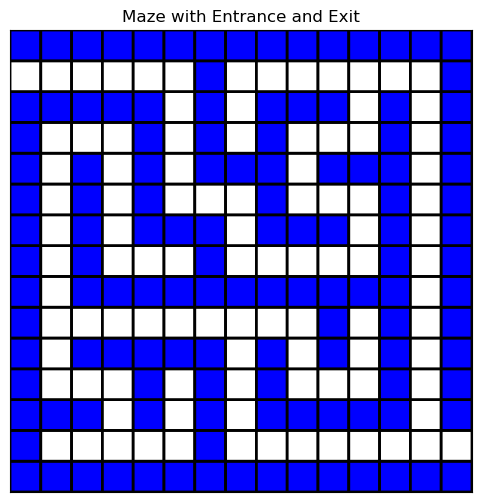

In [81]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Create a function to load the maze from a text file
def load_maze(file):
    maze = np.loadtxt(file, dtype=int)
    return maze

def display_maze(maze):
    cmap = ListedColormap(['white', 'black', 'green', 'blue'])
    plt.figure(figsize=(6, 6))
    plt.pcolor(maze[::-1], cmap=cmap, edgecolors='k', linewidths=2)
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title('Maze with Entrance and Exit')
    plt.show()


maze = load_maze('maze_case_base.txt')
n = maze.shape[0]
#maze[n-2, n-1] = 3  # salida
#maze[9, 10] = 3  # salida
#maze[1, 0] = 3  # entrada
#maze[1, 1] = 2 # medio
#maze[3, 1] = 2 # medio
display_maze(maze)

### Representación Cromosómica

El tamaño del cromosoma será de n², donde n es el tamaño del laberinto. Este tamaño asegura que nunca se necesitarán más de n² pasos para llegar a la salida, ya que el robot siempre encontrará la salida en un número menor de pasos, y las dimensiones del laberinto dictarán el límite máximo de movimientos

Cada gen representará un movimiento. Los posibles movimientos seran 4 direcciones: norte, sur, este, oeste. Cada gen será representado por un número que indica la acción a tomar.

Si en algun punto llega a la salida antes de su ultimo movimiento, se considera que es correcto y no se toma en cuenta lo que quede de cromosoma



### Operadores Geneticos

### Implementación de Operadores Geneticos

In [82]:
# Definir las posibles acciones
MOVES = ['1', '2', '3', '4']  # Norte, Sur, Este, Oeste

n = maze.shape[0]  # Tamaño del laberinto

def create_individual(n):
    # El cromosoma tiene tamaño n^2 (el tamaño del laberinto)
    return [random.choice(MOVES) for _ in range((n-2)**2)]

# Crear los elementos de DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar aptitud
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()


# Función que envolviera la creación del individuo y le pasara el tamaño 'n'
def create_individual_with_size():
    return create_individual(n)

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual_with_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Función de aptitud ajustada
def evaluate(individual, maze):
    n = maze.shape[0]  # Tamaño del laberinto
    x, y = 0, 1  # Posición inicial del robot
    steps = 0
    for move in individual:
        steps += 1
        if move == '1':
            y -= 1
        elif move == '2':
            y += 1
        elif move == '3':
            x += 1
        elif move == '4':
            x -= 1

        # Comprobar si el robot choca con una pared (en el laberinto)
        if maze[y][x] == 1:
            return -(n*n) + steps,  # Penalización por colisión
            # Es mejor que el robot choque con una pared luego de haber recorrido una distancia considerable, 
            # por lo que se penaliza menos que si choca luego de varios pasos

        # Comprobar si el robot está fuera de los límites del laberinto
        if x < 0 or y < 0 or x >= n or y >= n:
            return -(n*n) + steps,  # Penalización por salirse del laberinto

        # Si llegó a la salida (suponiendo que la salida está en la última posición (n-1, n-1))
        if (x, y) == (n-1, n-2):
            # Si llegó a la salida, devuelve positivo
            return n*n - steps,  # Se penaliza por el número de pasos

    # Si no llega a la salida, penaliza la distancia recorrida
    return -steps//2,  # Penaliza por la cantidad de pasos

toolbox.register("evaluate", evaluate, maze = maze)

# Operadores genéticos
toolbox.register("mate", tools.cxOnePoint)  # Cruce de dos puntos
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)  # Mutación
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo

pop = toolbox.population(n=200)  # Crear población con 100 individuos

# Parámetros del algoritmo genético
prob_mate = 0.7  # Probabilidad de cruce
prob_mutate = 0.2  # Probabilidad de mutación
generation = 300  # Número de generaciones

# Estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# Hall of Fame
hof = tools.HallOfFame(2)

# Ejecución del algoritmo genético
random.seed(42)
pop, log = algorithms.eaSimple(pop, toolbox,
                               cxpb=prob_mate, mutpb=prob_mutate,
                               ngen=generation, stats=stats,
                               halloffame=hof, verbose=True)


gen	nevals	avg    	min 	max 
0  	200   	-223.56	-224	-219
1  	155   	-222.925	-224	-219
2  	142   	-221.665	-224	-219
3  	154   	-220.59 	-224	-217
4  	162   	-219.89 	-224	-217
5  	156   	-219.445	-224	-217
6  	145   	-219.21 	-224	-217
7  	156   	-218.91 	-224	-217
8  	145   	-218.51 	-224	-216
9  	158   	-218.005	-224	-216
10 	155   	-217.54 	-224	-216
11 	142   	-217.375	-224	-216
12 	152   	-217.46 	-224	-216
13 	153   	-217.105	-224	-216
14 	157   	-216.54 	-224	-213
15 	154   	-216.19 	-223	-213
16 	163   	-216.565	-224	-213
17 	146   	-215.79 	-224	-213
18 	167   	-215.465	-224	-212
19 	145   	-214.94 	-224	-211
20 	144   	-214.53 	-224	-211
21 	156   	-214    	-224	-211
22 	142   	-214.015	-224	-211
23 	144   	-213.245	-224	-211
24 	165   	-213.385	-224	-211
25 	152   	-212.82 	-224	-211
26 	143   	-212.45 	-224	-211
27 	153   	-212.52 	-224	-210
28 	156   	-212.78 	-224	-210
29 	147   	-212.53 	-224	-210
30 	155   	-212.23 	-224	-210
31 	147   	-212.21 	-224	-209
32 	152   	-

### Visualización de Trayectoria

In [83]:
# Mostrar resultados finales
best = hof[0]
print("\nMejor individuo (cromosoma):", best)
print(len(best))
fitness_val = best.fitness.values[0]
print("Fitness:", fitness_val)

if fitness_val > 0:
    print("El robot llegó a la salida.")
    # Visualización del camino recorrido por el mejor individuo
    path = []
    steps = 0
    x, y = 0, 1
    path.append((x, y))
    maze_camino = maze.copy()
    #maze_camino[1][0] = 3
    for move in best:
        steps += 1
        if move == '1': # Moverse hacia arriba
            y -= 1
        elif move == '2': # Moverse hacia abajo
            y += 1
        elif move == '3': # Moverse hacia la derecha
            x += 1
        elif move == '4': # Moverse hacia la izquierda
            x -= 1
        path.append((x, y))
        if not(x < 0 or y < 0 or x >= n or y >= n):
            maze_camino[y][x] = 3
        else:
            print("Fuera de los límites del laberinto")
            break
        if (x, y) == (n-1, n-2):
            break  # Salir si llegó a la salida

    display_maze(maze_camino)  # Mostrar el laberinto con el camino recorrido
else:
    print("El robot no llegó a la salida.")



Mejor individuo (cromosoma): ['3', '4', '3', '4', '3', '3', '3', '3', '3', '4', '4', '4', '3', '3', '3', '4', '4', '3', '4', '3', '3', '2', '2', '1', '1', '2', '2', '2', '2', '1', '1', '2', '1', '1', '1', '2', '2', '1', '1', '2', '2', '2', '2', '3', '2', '1', '2', '3', '3', '4', '1', '3', '2', '3', '1', '4', '3', '1', '1', '4', '1', '2', '3', '3', '2', '4', '1', '1', '4', '1', '2', '1', '1', '3', '1', '2', '1', '2', '3', '3', '1', '4', '4', '4', '4', '2', '1', '3', '4', '1', '3', '3', '3', '3', '3', '4', '2', '4', '2', '4', '1', '2', '2', '1', '2', '4', '4', '2', '3', '3', '2', '4', '4', '4', '4', '4', '3', '4', '2', '1', '2', '4', '4', '2', '4', '4', '2', '1', '2', '3', '3', '3', '4', '2', '4', '4', '2', '2', '1', '2', '1', '1', '4', '2', '4', '1', '3', '3', '2', '3', '3', '2', '2', '3', '3', '1', '2', '4', '4', '4', '4', '1', '1', '4', '1', '4', '1', '1', '1']
169
Fitness: -180.0
El robot no llegó a la salida.


### Analisis de convergencia